# Machine Vision

## Lecture Notebook

**Teacher** Timothe Mermet-Buffet

**Date** July 30, 2020

### Loading the dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import fetch_olivetti_faces

# We are getting the olivetti dataset of faces
data = fetch_olivetti_faces()

### Analysis of the dataset

In [11]:

# We can see how the dataset is structured
data['images'].shape

(400, 64, 64)

In [52]:
# The dataset contains 400 elements, that contains 64 elements, that contains 64 elements...

# The 400 elements are our images containing 64 pixels by 64 pixels (They are small images!)

first_image = data['images'][0] # take the first image of the dataset (return a Matrix of 64x64)
column = first_image[0] # take the first pixel on X (return a Vector of 64)
pixel = column[0] # take the first pixel on Y (return the value of my color on a grayscale)
pixel

0.30991736

In [13]:
# The algorithms we have seen before take Vector as input and not matrix...

# We have to reshape our individuals images matrix to a singular vector
X = data['images'].reshape(400, 64 * 64)

In [14]:
# Now you get 400 vectors of 4096 values.
X.shape

(400, 4096)

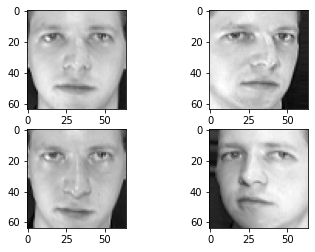

In [17]:
# You can plot on a 4x4 grid the first 4 images
plt.subplots(2, 2)
for i in range(0,4):
    plt.subplot(2, 2, i+1)
    # Don't forget to convert back your vector to a matrix! `imshow` takes a matrix 2x2 as input
    plt.imshow(X[i].reshape(64, 64), cmap=plt.cm.gray)

### Let's go for the preprocessing

In [ ]:
# Let's take one face (relevant for our demo)
face = X[100]

# Display the face
plt.imshow(face.reshape(64, 64), cmap=plt.cm.gray)

#### Zero mean (Z-mean)

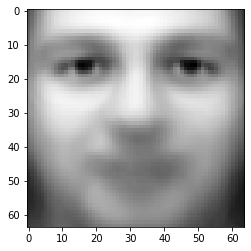

In [23]:
# Preprocessing: Zero mean (Z-mean) 
face_mean = X.mean(axis=0)

# Display the mean version of all the faces
plt.imshow(face_mean.reshape(64, 64), cmap=plt.cm.gray)

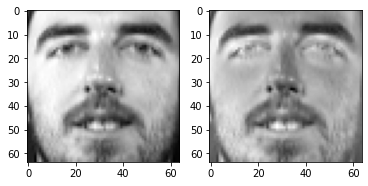

In [25]:
# Apply the Z-mean to our original face
z_face = face - face_mean

# Plot on 1x2 to display side by side the images
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.imshow(face.reshape(64, 64), cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(z_face.reshape(64, 64), cmap=plt.cm.gray)

# This will remove the average features of our original image.

#### Preprocessing: Normalization!

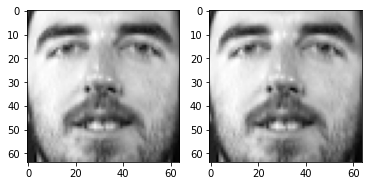

In [28]:
# Preprocessing: Normalization!

norm_face = (face - X.min()) / (X.max() - X.min())

# Display side by side
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.imshow(face.reshape(64, 64), cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(norm_face.reshape(64, 64), cmap=plt.cm.gray)

# Not much results, why?

# Because our dataset is already normalized!
# But in real life you will almost always work with un-normalized dataset.

#### Preprocessing: Standardisation

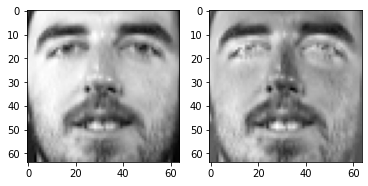

In [32]:
# Preprocessing: Standardisation (put the standard deviation to 1 and mean to zero)
std_face = (face - X.mean(axis=0)) / X.std(axis=0)

# We display our faces
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.imshow(face.reshape(64, 64), cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(std_face.reshape(64, 64), cmap=plt.cm.gray)

#### Preprocessing: Whitening

In [33]:
# Preprocessing: Whitening (Zero Component Analysis)
from sklearn.decomposition import PCA

pca = PCA(whiten=True)

# Fit our PCA to our complete dataset
pca.fit(X)

# Retrieve the specific components
X_components = pca.transform(X)

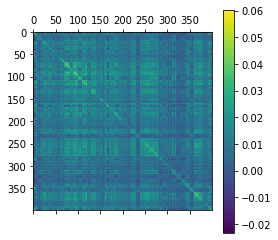

In [34]:
# Display the covariance matrix of the original dataset
plt.matshow(np.cov(X))
plt.colorbar()
plt.show()

# You can see that a lot of images contains similar elements
# This matrix represent 400 images by 400 images, it's usefull to compare the images with each others

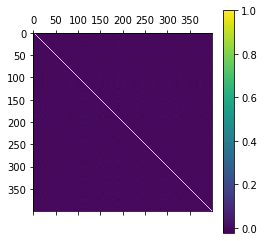

In [35]:
# Plot the X components matrix
plt.matshow(np.cov(X_components))
plt.colorbar()
plt.show()

In [36]:
# Where the magic happen! Apply the PCA components to our X_components
whiten_X = np.dot(X_components, pca.components_)

# We get our 400 images containing their specific features that make them unique!
whiten_X.shape

(400, 4096)

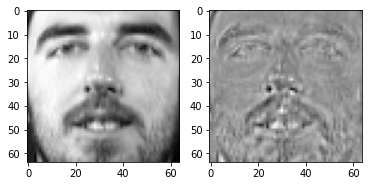

In [45]:
# Let's get the whiten version of our original face
whiten_face = whiten_X[100]

# Display the whiten version
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.imshow(face.reshape(64, 64), cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(whiten_face.reshape(64, 64), cmap=plt.cm.gray)

# You can see that now, we have the specificity of this person

#### Preprocessing: Convolution

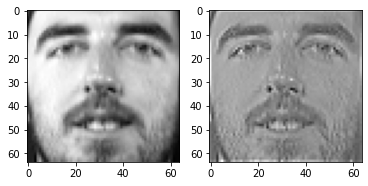

In [54]:
# Preprocessing: Convolution
from scipy.signal import convolve2d

# Set our kernel (here the sharpen kernel)
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Apply the convolution on our original face
conv_face = convolve2d(face.reshape(64, 64), kernel, mode='same')

# Display the face with the sharpened version aside
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.imshow(face.reshape(64, 64), cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(conv_face.reshape(64, 64), cmap=plt.cm.gray)